In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df1 = pd.read_csv(r'C:\Hr Emp Dataset\employee_data.csv')
df2 = pd.read_csv(r'C:\Hr Emp Dataset\training_and_development_data.csv')
merged = pd.merge(df1, df2, left_on = 'EmpID', right_on = 'Employee ID', how = 'inner')
merged.head()


,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Current Employee Rating,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,4,3427,15-Jul-23,Leadership Development,Internal,Failed,South Marisa,Taylor Rodriguez,2,606.11
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,3,3428,12-Sep-22,Customer Service,External,Incomplete,Tammieville,Kelly Patterson DDS,4,673.02
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,4,3429,13-Aug-22,Leadership Development,External,Failed,East Roberthaven,Taylor Thomas,2,413.28
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,2,3430,15-Dec-22,Project Management,External,Completed,Garzatown,Holly Elliott,3,663.78
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,3,3431,13-Jul-23,Technical Skills,External,Failed,Lake Meganville,Donald Martinez,5,399.03


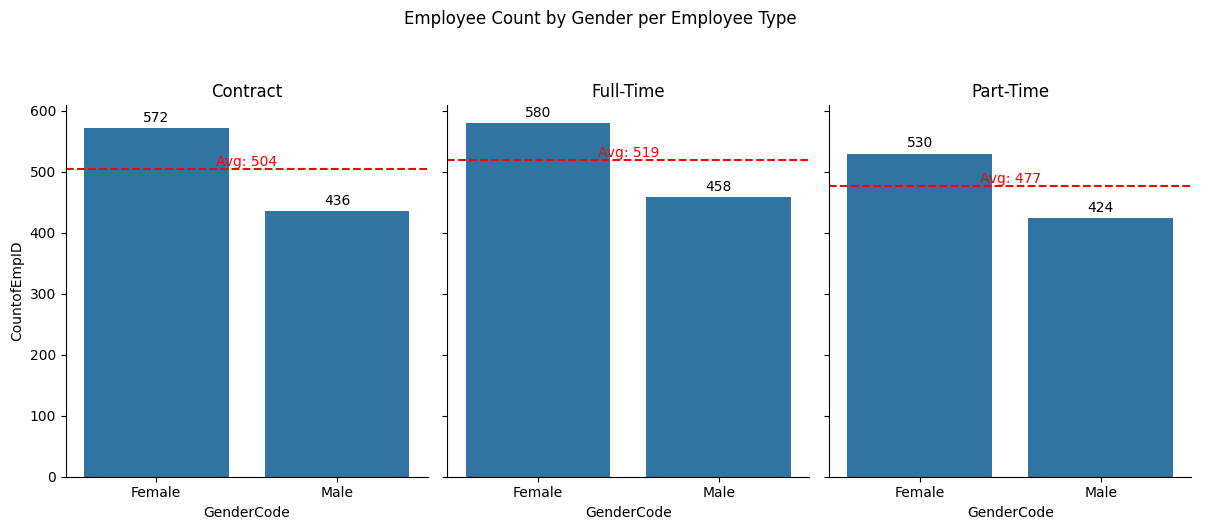

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned = merged.dropna(subset=['EmployeeType', 'GenderCode'])
grouped = cleaned.groupby(['EmployeeType', 'GenderCode'])['EmpID'].count().reset_index()
grouped.rename(columns={'EmpID': 'CountofEmpID'}, inplace=True)
averages = grouped.groupby('EmployeeType')['CountofEmpID'].mean().reset_index()
averages.rename(columns={'CountofEmpID': 'Average'}, inplace=True)
plot = pd.merge(grouped, averages, on='EmployeeType')

g = sns.catplot(data=plot, x='GenderCode', y='CountofEmpID',
                col='EmployeeType', kind='bar', height=5, aspect=0.8)
for ax, (etype, subdf) in zip(g.axes.flat, plot.groupby('EmployeeType')):
    avg = subdf['Average'].iloc[0]
    ax.axhline(avg, ls='--', color='red')
    ax.text(0.5, avg + 5, f'Avg: {int(avg)}', color='red', ha='center')
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5,
                f'{int(height)}', ha='center', va='bottom')

    ax.set_title(etype)

g.fig.suptitle('Employee Count by Gender per Employee Type', y=1.05)
g.fig.tight_layout()

plt.show()

C:\Users\Manav Dere\AppData\Local\Temp\ipykernel_11424\118387640.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


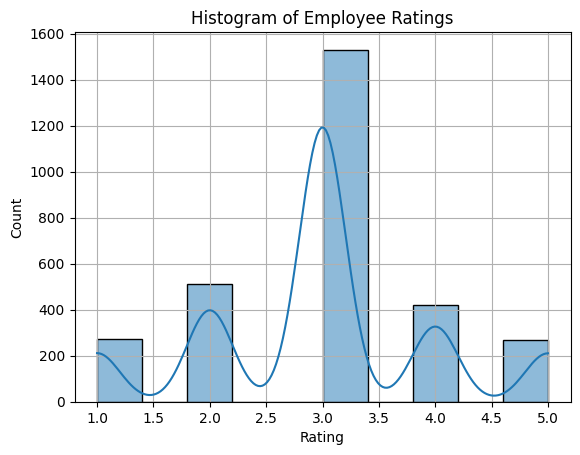

In [6]:
with pd.option_context('mode.use_inf_as_na', True):
    sns.histplot(data=df1, x='Current Employee Rating', bins=10, kde=True)
    plt.title("Histogram of Employee Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

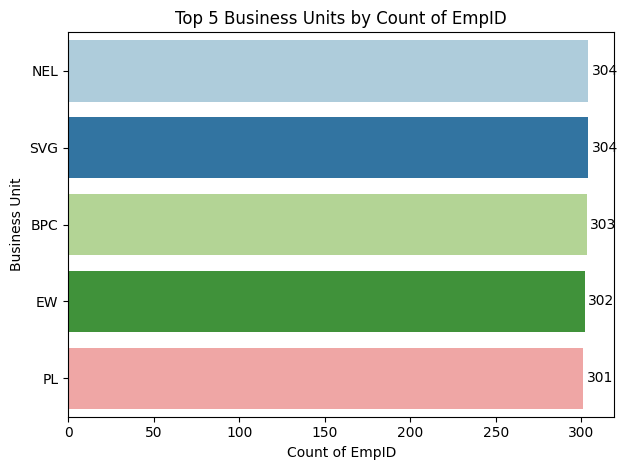

In [7]:
top5 = merged['BusinessUnit'].value_counts().nlargest(5).reset_index()
top5.columns = ['BusinessUnit', 'Count']

sns.barplot(data=top5, x='Count', y='BusinessUnit', hue='BusinessUnit', palette='Paired')

for i, row in top5.iterrows():
    plt.text(row['Count'] + 2, i, row['Count'], va='center')

plt.title('Top 5 Business Units by Count of EmpID')
plt.xlabel('Count of EmpID')
plt.ylabel('Business Unit')
plt.tight_layout()
plt.show()


C:\Users\Manav Dere\AppData\Local\Temp\ipykernel_11424\299156897.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gGroup, x='EmployeeType', y='EmployeeCount', palette='pastel')


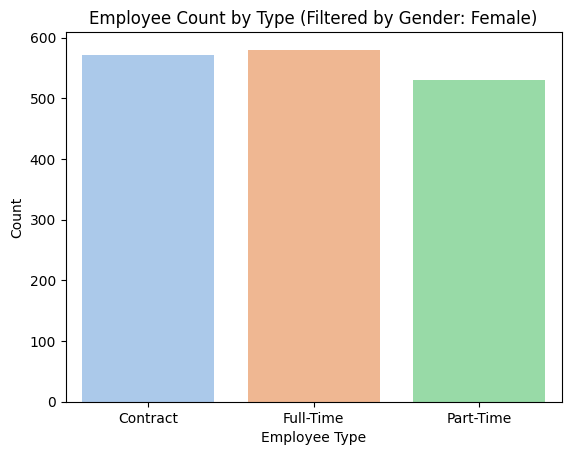

In [9]:
gen = 'Female'

filtered = merged[merged['GenderCode'] == gen]
gGroup = filtered.groupby('EmployeeType')['EmpID'].count().reset_index()
gGroup.rename(columns={'EmpID': 'EmployeeCount'}, inplace=True)

sns.barplot(data=gGroup, x='EmployeeType', y='EmployeeCount', palette='pastel')
plt.title(f"Employee Count by Type (Filtered by Gender: {gen})")
plt.xlabel("Employee Type")
plt.ylabel("Count")
plt.show()